In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import re
#import src.visualización as vs
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
!conda install --yes --prefix {sys.prefix} plotly
!pip install matplotlib inline

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [55]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [56]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

#### Hipótesis GAMES:
 - Comparación de participación de hombres y mujeres en la competición
 - Comparación de participación de mujeres y hombres de rango (40-44) 
 - Comparación de estaturas entre hombres y mujeres
 - La participación de mujeres de EEUU es mayor que la de hombres de Islandia
 - La media de edad de las mujeres es mayor que la media de edad de los hombres

In [4]:
df_crossfit_games = pd.read_csv("../data/clean_games.csv")

In [5]:
df_crossfit_games.head()

Unnamed: 0  height countryoforiginname  weight    affiliatename  \
0           0    1.74       United States    88.5  CrossFit Mayhem   
1           1    1.74       United States    88.5  CrossFit Mayhem   
2           2    1.74       United States    88.5  CrossFit Mayhem   
3           3    1.74       United States    88.5  CrossFit Mayhem   
4           4    1.74       United States    88.5  CrossFit Mayhem   

   competitorid gender  age competitorname  overallrank  overallscore  \
0        153604      M   29  Mathew Fraser            1         984.0   
1        153604      M   29  Mathew Fraser            1         984.0   
2        153604      M   29  Mathew Fraser            1         984.0   
3        153604      M   29  Mathew Fraser            1         984.0   
4        153604      M   29  Mathew Fraser            1         984.0   

  division  ordinal rank  points  
0      Men        1    1     100  
1      Men        2    1     100  
2      Men        3   17      68  
3      Men        4   21      40  
4      Men        5    2      96

In [144]:
df_g_country = pd.DataFrame(df_crossfit_games.groupby(["countryoforiginname", "competitorname"])["gender"].count()).reset_index()

In [145]:
df_g_country.head()

countryoforiginname     competitorname  gender
0         Afghanistan      Sami Salampur      12
1             Algeria      Chaker Alouni      12
2             Andorra        Enric Closa      12
3             Andorra  Miriam Torra Sola      12
4              Angola      Marco Almeida      12

In [131]:
df_g_country.rename(columns={"competitorname":"otra"}, inplace=True)

In [132]:
df_g_country.reset_index(inplace=True)

In [136]:
df_redi = pd.DataFrame(df_g_country.groupby("countryoforiginname")["competitorname"].count()).reset_index()
df_redi.head()

countryoforiginname  competitorname
0         Afghanistan               1
1             Algeria               1
2             Andorra               2
3              Angola               1
4           Argentina               2

In [101]:
#df_plot1 = pd.DataFrame(df_crossfit_games.groupby(["countryoforiginname", "overallrank"]).agg({"overallrank": "count"}))

In [102]:
#df_plot1

overallrank
countryoforiginname overallrank             
Afghanistan         133                   12
Algeria             122                   12
Andorra             117                   12
                    138                   12
Angola              97                    12
...                                      ...
Venezuela           67                    12
                    117                   12
Viet Nam            117                   12
                    138                   12
Zimbabwe            76                    12

[299 rows x 1 columns]

In [180]:
df_redi.to_csv("../data/redi_games.csv")

In [6]:
#df_crossfit_games["height"].values[0]

1.74

In [148]:
# Generamos la figura y establecemos los valores para configurar
# el encuadre, la paleta de colores, la capa de datos, la etiqueta
fig = go.Figure(go.Choropleth(
    locations = df_redi['countryoforiginname'],
    locationmode = "country names",
    z = df_redi['competitorname'],
    text = df_redi['countryoforiginname'],
    colorscale = 'magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#efefef',
    marker_line_width=0.1,
    #colorbar_ticksuffix = '%',
    colorbar_title = 'Number competitors',
    )
)
 
# Establecemos las características del título y la apariencia del mapa base
fig.update_layout(
    title_text = 'Players per Country',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=50,
        projection_type='miller',
        showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#eaeaea',
        lakecolor='#eaeaea',
        coastlinecolor='#dadada'
    )
)
 

# Mostramos la figura generada
fig.show()

### Vemos que la mayor pariticipación se da en EE.UU, Canadá, Australia

In [ ]:
mergeado_open_19.to_csv("../data/clean_open19.csv")

In [88]:
# Generamos la figura y establecemos los valores para configurar
# el encuadre, la paleta de colores, la capa de datos, la etiqueta
fig = go.Figure(go.Choropleth(
    locations = df_crossfit_games['countryoforiginname'],
    locationmode = "country names",
    z = df_crossfit_games['points'],
    text = df_crossfit_games['countryoforiginname'],
    colorscale = 'magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#efefef',
    marker_line_width=0.1,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Average Score',
    )
)
 
# Establecemos las características del título y la apariencia del mapa base
fig.update_layout(
    title_text = 'Points per Country',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=50,
        projection_type='miller',
        showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#eaeaea',
        lakecolor='#eaeaea',
        coastlinecolor='#dadada'
    )
)
 

# Mostramos la figura generada
fig.show()

### La puntuación máxima en los Games se da en Islandia, Francia, Autralia, EE.UU

In [7]:
fig = px.histogram(df_crossfit_games, x="age")
fig.add_vline(df_crossfit_games.age.median(), line_width=3, line_dash="dash", line_color="purple")
fig.add_vline(df_crossfit_games.age.mean(), line_width=3, line_dash="dash", line_color="green")
fig.show()

### La edad media de participantes es de 33 años, y la mediana es 30 años

In [8]:
fig = px.histogram(df_crossfit_games, x="countryoforiginname")
fig.update_layout(bargap=0.2)
fig.show()

#### A nivel general en la competición de los Games de Crossfit vamos que la media de edad es de 33 años mientras que la mediana es de 30 años y que hay una mayor participación de personas de EEUU, Canadá, Australia, Islandia y Alemania, respecto del resto de países.

In [9]:
fig = px.histogram(df_crossfit_games, x="gender")
fig.update_layout(bargap=0.2)
fig.show()

In [60]:
df_crossfit_games

Unnamed: 0  height countryoforiginname  weight    affiliatename  \
0              0    1.74       United States    88.5  CrossFit Mayhem   
1              1    1.74       United States    88.5  CrossFit Mayhem   
2              2    1.74       United States    88.5  CrossFit Mayhem   
3              3    1.74       United States    88.5  CrossFit Mayhem   
4              4    1.74       United States    88.5  CrossFit Mayhem   
...          ...     ...                 ...     ...              ...   
4208        4208    1.68              Canada    55.8   CrossFit Lions   
4209        4209    1.68              Canada    55.8   CrossFit Lions   
4210        4210    1.68              Canada    55.8   CrossFit Lions   
4211        4211    1.68              Canada    55.8   CrossFit Lions   
4212        4212    1.68              Canada    55.8   CrossFit Lions   

      competitorid gender  age competitorname  overallrank  overallscore  \
0           153604      M   29  Mathew Fraser            1         984.0   
1           153604      M   29  Mathew Fraser            1         984.0   
2           153604      M   29  Mathew Fraser            1         984.0   
3           153604      M   29  Mathew Fraser            1         984.0   
4           153604      M   29  Mathew Fraser            1         984.0   
...            ...    ...  ...            ...          ...           ...   
4208         62910      F   60     Debby Cook           10         190.0   
4209         62910      F   60     Debby Cook           10         190.0   
4210         62910      F   60     Debby Cook           10         190.0   
4211         62910      F   60     Debby Cook           10         190.0   
4212         62910      F   60     Debby Cook           10         190.0   

         division  ordinal rank  points  
0             Men        1    1     100  
1             Men        2    1     100  
2             Men        3   17      68  
3             Men        4   21      40  
4             Men        5    2      96  
...           ...      ...  ...     ...  
4208  Women (60+)        3    9      20  
4209  Women (60+)        4   10      10  
4210  Women (60+)        5   WD       0  
4211  Women (60+)        6   WD       0  
4212  Women (60+)        7   WD       0  

[4213 rows x 15 columns]

In [165]:
fig = px.histogram(df_crossfit_games, x="division") #color="gender", barmode="group"
fig.update_layout(bargap=0.2)
fig.show()

In [151]:
df_games_ages = df_crossfit_games[(df_crossfit_games["division"]!='Men') & (df_crossfit_games["division"]!= 'Women')]

In [162]:
df_games_ages

Unnamed: 0  height countryoforiginname  weight   affiliatename  \
3300        3300    1.55       United States    87.1    CrossFit 061   
3301        3301    1.55       United States    87.1    CrossFit 061   
3302        3302    1.55       United States    87.1    CrossFit 061   
3303        3303    1.55       United States    87.1    CrossFit 061   
3304        3304    1.55       United States    87.1    CrossFit 061   
...          ...     ...                 ...     ...             ...   
4208        4208    1.68              Canada    55.8  CrossFit Lions   
4209        4209    1.68              Canada    55.8  CrossFit Lions   
4210        4210    1.68              Canada    55.8  CrossFit Lions   
4211        4211    1.68              Canada    55.8  CrossFit Lions   
4212        4212    1.68              Canada    55.8  CrossFit Lions   

      competitorid gender  age    competitorname  overallrank  overallscore  \
3300          5312      M   35  Nicholas Urankar            1         650.0   
3301          5312      M   35  Nicholas Urankar            1         650.0   
3302          5312      M   35  Nicholas Urankar            1         650.0   
3303          5312      M   35  Nicholas Urankar            1         650.0   
3304          5312      M   35  Nicholas Urankar            1         650.0   
...            ...    ...  ...               ...          ...           ...   
4208         62910      F   60        Debby Cook           10         190.0   
4209         62910      F   60        Debby Cook           10         190.0   
4210         62910      F   60        Debby Cook           10         190.0   
4211         62910      F   60        Debby Cook           10         190.0   
4212         62910      F   60        Debby Cook           10         190.0   

         division  ordinal rank  points  
3300  Men (35-39)        1    1     100  
3301  Men (35-39)        2    2      90  
3302  Men (35-39)        3    6      50  
3303  Men (35-39)        4    1     100  
3304  Men (35-39)        5    1     100  
...           ...      ...  ...     ...  
4208  Women (60+)        3    9      20  
4209  Women (60+)        4   10      10  
4210  Women (60+)        5   WD       0  
4211  Women (60+)        6   WD       0  
4212  Women (60+)        7   WD       0  

[913 rows x 15 columns]

In [181]:
fig = px.histogram(df_games_ages, x="division", color = "gender") #barmode="group", ) #color="gender", barmode="group"
fig.update_layout(bargap=0.2)
fig.show()

In [273]:
df_games_ages.head()

Unnamed: 0  height countryoforiginname  weight affiliatename  \
3300        3300    1.55       United States    87.1  CrossFit 061   
3301        3301    1.55       United States    87.1  CrossFit 061   
3302        3302    1.55       United States    87.1  CrossFit 061   
3303        3303    1.55       United States    87.1  CrossFit 061   
3304        3304    1.55       United States    87.1  CrossFit 061   

      competitorid gender  age    competitorname  overallrank  overallscore  \
3300          5312      M   35  Nicholas Urankar            1         650.0   
3301          5312      M   35  Nicholas Urankar            1         650.0   
3302          5312      M   35  Nicholas Urankar            1         650.0   
3303          5312      M   35  Nicholas Urankar            1         650.0   
3304          5312      M   35  Nicholas Urankar            1         650.0   

         division  ordinal rank  points  
3300  Men (35-39)        1    1     100  
3301  Men (35-39)        2    2      90  
3302  Men (35-39)        3    6      50  
3303  Men (35-39)        4    1     100  
3304  Men (35-39)        5    1     100

In [290]:
#original
agrupado =pd.DataFrame(df_crossfit_games.groupby(["division"])["gender"].value_counts())
agrupado

gender
division      gender        
Men           M         1728
Men (35-39)   M           80
Men (40-44)   M           80
Men (45-49)   M           80
Men (50-54)   M           80
Men (55-59)   M           63
Men (60+)     M           70
Women         F         1572
Women (35-39) F           80
Women (40-44) F           80
Women (45-49) F           80
Women (50-54) F           80
Women (55-59) F           70
Women (60+)   F           70

In [291]:
agrupado.columns

Index(['gender'], dtype='object')

In [292]:
agrupado.rename(columns={"gender":"count"}, inplace=True)

In [293]:
agrupado.reset_index(inplace=True)

In [294]:
def soniadice(x):
    ay = x.split(" ")
    print(ay)
    if len(ay) > 1:
        return ay[1]
    else:
        return "(17-34)"

In [297]:
agrupado["categorias"] = agrupado["division"].apply(soniadice)

['Men']
['Men', '(35-39)']
['Men', '(40-44)']
['Men', '(45-49)']
['Men', '(50-54)']
['Men', '(55-59)']
['Men', '(60+)']
['Women']
['Women', '(35-39)']
['Women', '(40-44)']
['Women', '(45-49)']
['Women', '(50-54)']
['Women', '(55-59)']
['Women', '(60+)']


In [298]:
px.histogram(agrupado, x='categorias', y="count", color="gender", barmode='group')

#### Se observa que la participación de hombres es mayor que la de mujeres, pero solo en la categoría general hasta los 35 años, de ahí en adelante la participación es la misma,  inlcluso mayor en mujeres que en hombres.

In [11]:
hist_data = [df_crossfit_games.age]
labels = ["Edad"]

In [12]:
fig = ff.create_distplot(hist_data, labels)
fig.show()

In [13]:
fig = px.box(df_crossfit_games, x="division", y="age")
fig.show()

In [14]:
fig = px.box(df_crossfit_games, x="division", y="age", color="gender", color_discrete_map={1: '#19D3F3', 0: 'red'}) 
fig.show()

#### La persona participante más joven es una mujer, y la persona participante más mayor es un hombre

In [17]:
df_division_40_44 = df_crossfit_games[(df_crossfit_games["division"].isin(["Men (40-44)","Women (40-44)"])) & (df_crossfit_games["gender"])]
df_division_40_44

Unnamed: 0  height countryoforiginname  weight    affiliatename  \
3460        3460    1.77       United States    86.2    5280 CrossFit   
3461        3461    1.77       United States    86.2    5280 CrossFit   
3462        3462    1.77       United States    86.2    5280 CrossFit   
3463        3463    1.77       United States    86.2    5280 CrossFit   
3464        3464    1.77       United States    86.2    5280 CrossFit   
...          ...     ...                 ...     ...              ...   
3615        3615    1.71       United States    66.7  CrossFit Viento   
3616        3616    1.71       United States    66.7  CrossFit Viento   
3617        3617    1.71       United States    66.7  CrossFit Viento   
3618        3618    1.71       United States    66.7  CrossFit Viento   
3619        3619    1.71       United States    66.7  CrossFit Viento   

      competitorid gender  age competitorname  overallrank  overallscore  \
3460        532455      M   43    Jason Grubb            1         640.0   
3461        532455      M   43    Jason Grubb            1         640.0   
3462        532455      M   43    Jason Grubb            1         640.0   
3463        532455      M   43    Jason Grubb            1         640.0   
3464        532455      M   43    Jason Grubb            1         640.0   
...            ...    ...  ...            ...          ...           ...   
3615         12348      F   44  Karen McCadam           10          40.0   
3616         12348      F   44  Karen McCadam           10          40.0   
3617         12348      F   44  Karen McCadam           10          40.0   
3618         12348      F   44  Karen McCadam           10          40.0   
3619         12348      F   44  Karen McCadam           10          40.0   

           division  ordinal rank  points  
3460    Men (40-44)        1    8      30  
3461    Men (40-44)        2    2      90  
3462    Men (40-44)        3    2      90  
3463    Men (40-44)        4    2      90  
3464    Men (40-44)        5    1     100  
...             ...      ...  ...     ...  
3615  Women (40-44)        4   WD       0  
3616  Women (40-44)        5   WD       0  
3617  Women (40-44)        6   WD       0  
3618  Women (40-44)        7   WD       0  
3619  Women (40-44)        8   WD       0  

[160 rows x 15 columns]

In [18]:
fig = px.bar(df_division_40_44, x="gender", y="height") #¿¿ por qué me sale la altura en la y mal???
fig.show()

In [19]:
df_games_woman = df_crossfit_games[df_crossfit_games["gender"] == "F"]

In [33]:
fig = px.scatter(df_games_woman, x="height", y="weight", color="age")
fig.show()

In [20]:
top5_games_w = df_games_woman.loc[(df_games_woman["overallrank"] < 6)] 

In [27]:
top5_games_w.shape

(290, 15)

In [28]:
top5_games_w

Unnamed: 0  height countryoforiginname  weight  \
1728        1728    1.65           Australia    58.1   
1729        1729    1.65           Australia    58.1   
1730        1730    1.65           Australia    58.1   
1731        1731    1.65           Australia    58.1   
1732        1732    1.65           Australia    58.1   
...          ...     ...                 ...     ...   
4173        4173    1.71         New Zealand    59.9   
4174        4174    1.71         New Zealand    59.9   
4175        4175    1.71         New Zealand    59.9   
4176        4176    1.71         New Zealand    59.9   
4177        4177    1.71         New Zealand    59.9   

                     affiliatename  competitorid gender  age  \
1728               CrossFit Mayhem        163097      F   25   
1729               CrossFit Mayhem        163097      F   25   
1730               CrossFit Mayhem        163097      F   25   
1731               CrossFit Mayhem        163097      F   25   
1732               CrossFit Mayhem        163097      F   25   
...                            ...           ...    ...  ...   
4173  Functional Strength CrossFit        243666      F   60   
4174  Functional Strength CrossFit        243666      F   60   
4175  Functional Strength CrossFit        243666      F   60   
4176  Functional Strength CrossFit        243666      F   60   
4177  Functional Strength CrossFit        243666      F   60   

        competitorname  overallrank  overallscore     division  ordinal rank  \
1728  Tia-Clair Toomey            1        1071.0        Women        1    1   
1729  Tia-Clair Toomey            1        1071.0        Women        2   12   
1730  Tia-Clair Toomey            1        1071.0        Women        3    2   
1731  Tia-Clair Toomey            1        1071.0        Women        4   12   
1732  Tia-Clair Toomey            1        1071.0        Women        5    4   
...                ...          ...           ...          ...      ...  ...   
4173       Diana Flynn            5         400.0  Women (60+)        3    4   
4174       Diana Flynn            5         400.0  Women (60+)        4    4   
4175       Diana Flynn            5         400.0  Women (60+)        5    4   
4176       Diana Flynn            5         400.0  Women (60+)        6    3   
4177       Diana Flynn            5         400.0  Women (60+)        7    5   

      points  
1728     100  
1729      78  
1730      98  
1731      67  
1732      88  
...      ...  
4173      70  
4174      70  
4175      70  
4176      80  
4177      60  

[290 rows x 15 columns]

In [25]:
fig = px.histogram(top5_games_w, x="countryoforiginname", y= "points")
fig.update_layout(bargap=0.2)
fig.show()

In [29]:
unicas = df_games_woman.countryoforiginname.value_counts() < 13

In [30]:
df_games_woman["competitors"] = df_games_woman["countryoforiginname"].apply(lambda x: "Unique" if unicas.loc[x] == True else "Several")

In [299]:
df_games_woman

Unnamed: 0  height countryoforiginname  weight    affiliatename  \
1728        1728    1.65           Australia    58.1  CrossFit Mayhem   
1729        1729    1.65           Australia    58.1  CrossFit Mayhem   
1730        1730    1.65           Australia    58.1  CrossFit Mayhem   
1731        1731    1.65           Australia    58.1  CrossFit Mayhem   
1732        1732    1.65           Australia    58.1  CrossFit Mayhem   
...          ...     ...                 ...     ...              ...   
4208        4208    1.68              Canada    55.8   CrossFit Lions   
4209        4209    1.68              Canada    55.8   CrossFit Lions   
4210        4210    1.68              Canada    55.8   CrossFit Lions   
4211        4211    1.68              Canada    55.8   CrossFit Lions   
4212        4212    1.68              Canada    55.8   CrossFit Lions   

      competitorid gender  age    competitorname  overallrank  overallscore  \
1728        163097      F   25  Tia-Clair Toomey            1        1071.0   
1729        163097      F   25  Tia-Clair Toomey            1        1071.0   
1730        163097      F   25  Tia-Clair Toomey            1        1071.0   
1731        163097      F   25  Tia-Clair Toomey            1        1071.0   
1732        163097      F   25  Tia-Clair Toomey            1        1071.0   
...            ...    ...  ...               ...          ...           ...   
4208         62910      F   60        Debby Cook           10         190.0   
4209         62910      F   60        Debby Cook           10         190.0   
4210         62910      F   60        Debby Cook           10         190.0   
4211         62910      F   60        Debby Cook           10         190.0   
4212         62910      F   60        Debby Cook           10         190.0   

         division  ordinal rank  points competitors  
1728        Women        1    1     100     Several  
1729        Women        2   12      78     Several  
1730        Women        3    2      98     Several  
1731        Women        4   12      67     Several  
1732        Women        5    4      88     Several  
...           ...      ...  ...     ...         ...  
4208  Women (60+)        3    9      20     Several  
4209  Women (60+)        4   10      10     Several  
4210  Women (60+)        5   WD       0     Several  
4211  Women (60+)        6   WD       0     Several  
4212  Women (60+)        7   WD       0     Several  

[2032 rows x 16 columns]

In [311]:
agrupado_pais =pd.DataFrame(df_games_woman.groupby(["countryoforiginname"])["competitors"].value_counts())
agrupado_pais

competitors
countryoforiginname competitors             
Andorra             Unique                12
Argentina           Unique                12
Australia           Several               78
Austria             Unique                12
Bahamas             Unique                12
...                                      ...
United Kingdom      Several               28
United States       Several              515
Uruguay             Unique                12
Venezuela           Unique                12
Viet Nam            Unique                12

[96 rows x 1 columns]

In [314]:
agrupado_pais.rename(columns={"competitors":"count"}, inplace=True)

In [318]:
agrupado_pais.reset_index(inplace=True)

In [319]:
agrupado_pais

countryoforiginname competitors  count
0              Andorra      Unique     12
1            Argentina      Unique     12
2            Australia     Several     78
3              Austria      Unique     12
4              Bahamas      Unique     12
..                 ...         ...    ...
91      United Kingdom     Several     28
92       United States     Several    515
93             Uruguay      Unique     12
94           Venezuela      Unique     12
95            Viet Nam      Unique     12

[96 rows x 3 columns]

In [321]:
fig = px.bar(agrupado_pais, x="competitors", y="count", color = "countryoforiginname")
fig.show()

#### La mayoría de países tiene solo una representante femenina para sus competiciones y en este caso forman parte de la categoría hasta 35 años.

In [300]:
df_games_woman.to_csv("../data/unique_several.csv")

### OPEN

In [41]:
df_crossfit_open_19 = pd.read_csv("../data/clean_open19.csv")

In [42]:
df_crossfit_open_19.head()

Unnamed: 0  competitorid   competitorname gender countryoforiginname  \
0           0          2536  Samantha Briggs      F      United Kingdom   
1           1          2536  Samantha Briggs      F      United Kingdom   
2           2          2536  Samantha Briggs      F      United Kingdom   
3           3          2536  Samantha Briggs      F      United Kingdom   
4           4          2536  Samantha Briggs      F      United Kingdom   

         affiliatename  age height weight  overallrank  overallscore  \
0  CrossFit Black Five   37    1.7  61.23            1            33   
1  CrossFit Black Five   37    1.7  61.23            1            33   
2  CrossFit Black Five   37    1.7  61.23            1            33   
3  CrossFit Black Five   37    1.7  61.23            1            33   
4  CrossFit Black Five   37    1.7  61.23            1            33   

   is_scaled     division_x               affiliate division_y  ordinal  rank  \
0          0  Women (35-39)    Royal Docks CrossFit      Women        1     5   
1          0  Women (35-39)     CrossFit Black Five      Women        2   160   
2          0  Women (35-39)        CrossFit Berserk      Women        3   218   
3          0  Women (35-39)  CrossFit Club La Santa      Women        4     9   
4          0  Women (35-39)  CrossFit Club La Santa      Women        5    14   

   scaled     score  
0       0  13550000  
1       0  14280325  
2       0  11710184  
3       0  11320172  
4       0  12100711

In [43]:
df_crossfit_open_19.gender.unique()

array(['F', 'M'], dtype=object)

In [ ]:
df_top5_open_general = df_crossfit_open_19.loc[(df_crossfit_open_19["overallrank"] < 3)] & 

In [44]:
df_open_19_woman = df_crossfit_open_19[df_crossfit_open_19["gender"] == "F"]

In [197]:
top5_open_19_w = df_open_19_woman.loc[(df_open_19_woman["overallrank"] < 3)] & (df_open_19_woman["division_x"] == 'Women (35-39)')

In [198]:
top5_open_19_w.shape

(350, 19)

In [222]:
top5_open_19_w.to_csv("../data/top5_w_open.csv")

In [199]:
fig = px.histogram(top5_open_19_w, x="affiliatename", y= "overallrank")
fig.update_layout(bargap=0.2)
fig.show()

### Los boxes que tienen participantes con más puntuación en los OPEN a nivel mundial

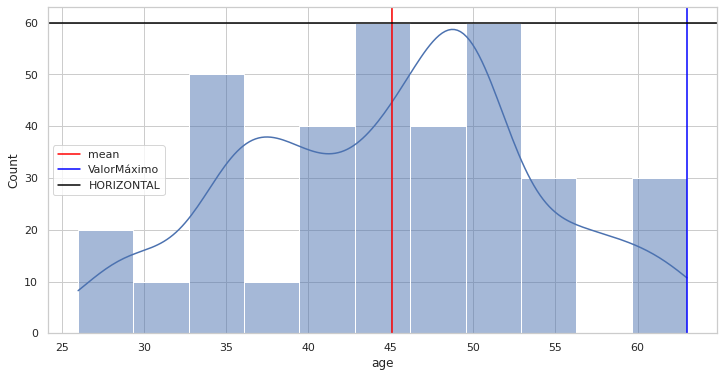

In [221]:
graf = sns.histplot(x=top5_open_19_w.age, kde=True) # Hemos guardado el gráfico como una variable
graf.axvline(x=top5_open_19_w.age.mean(), c="red", label="mean") #Antes había puesto dropna pero no hace falta
#graf.axvline(x=top5_open_19_w.age.median(), c="green", label="median")
graf.axvline(x=top5_open_19_w.age.max(), c="blue", label="ValorMáximo") #Sobre la vertical marcamos eje x
graf.axhline(y=60, c="black", label="HORIZONTAL") #Sobre la horizontal marcamos eje y
plt.legend();

In [184]:
fig = px.box(top5_open_19_w, x="age")
fig.show()

In [173]:
fig = px.scatter(top5_open_19_w, x="age", y="weight", color="division_y")
fig.show()

In [200]:
df_open_19_woman.countryoforiginname.unique()

array(['United Kingdom', 'Brazil', 'United States', 'Italy',
       'Switzerland', 'New Zealand', 'Canada', 'Spain', 'Belgium',
       'Chile', 'Finland', 'Australia', 'Sweden', 'France', 'Iceland',
       'Mexico', 'Argentina', 'Norway', 'Malta', 'Ukraine', 'Poland',
       'Russian Federation', 'Bulgaria', 'Croatia', 'Costa Rica',
       'Romania', 'Egypt', 'Jordan', 'Denmark', 'Netherlands',
       'South Africa', 'Greece', 'Namibia', 'Colombia', 'Germany',
       'Portugal', 'Hungary', 'Turkey', 'Dominican Republic', 'Ireland',
       'Barbados', 'Indonesia', 'Singapore', 'Tunisia', 'Austria',
       'Israel', 'China', 'Lithuania', 'Czech Republic', 'Paraguay',
       'Korea, Republic of', 'Latvia', 'Uruguay', 'Venezuela',
       'Guatemala', 'Slovakia', 'Samoa', 'Kenya', 'Trinidad and Tobago',
       'Panama', 'Peru', 'Georgia', 'Belize', 'United Arab Emirates',
       'Honduras', 'El Salvador', 'Nicaragua', 'Philippines', 'Bahrain',
       'Kazakhstan', 'Malaysia', 'Brunei Daruss

In [324]:
df_score_country = df_open_19_woman[(df_open_19_woman["countryoforiginname"].isin(["Spain","Germany", "Portugal", "France", "Italy"]))] #& (df_open_19_woman["division_x"] == 'Women (35-39)')]

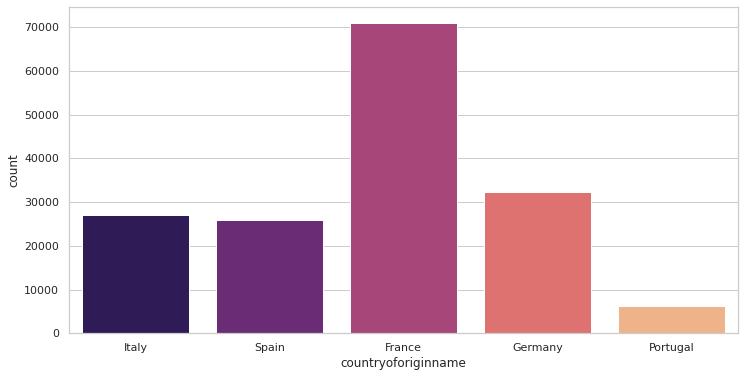

In [327]:
sns.countplot(x="countryoforiginname", data=df_score_country, palette="magma");

In [223]:
fig = px.bar(df_score_country, x="countryoforiginname", y="competitorname") #color="division_x")
fig.show()

In [51]:
corr_19 = df_open_19_woman.corr()

In [52]:
corr_19

Unnamed: 0  competitorid           age   overallrank  \
Unnamed: 0      1.000000  1.933873e-01  3.377188e-01  1.104033e-01   
competitorid    0.193387  1.000000e+00 -1.233896e-01  1.566600e-01   
age             0.337719 -1.233896e-01  1.000000e+00 -2.091365e-01   
overallrank     0.110403  1.566600e-01 -2.091365e-01  1.000000e+00   
overallscore    0.072997  1.366770e-01 -2.323934e-01  9.952249e-01   
is_scaled       0.213594  1.954143e-01  8.909312e-02 -4.259624e-01   
ordinal         0.000002 -2.644130e-15 -8.227936e-16 -2.753322e-15   
rank            0.070140  1.313208e-01 -2.232862e-01  2.321020e-01   
scaled          0.209355  2.834777e-01  1.199771e-01  2.734952e-02   
score          -0.407284 -3.612440e-01 -1.267920e-01 -1.932532e-01   

              overallscore     is_scaled       ordinal      rank    scaled  \
Unnamed: 0    7.299726e-02  2.135939e-01  1.579167e-06  0.070140  0.209355   
competitorid  1.366770e-01  1.954143e-01 -2.644130e-15  0.131321  0.283478   
age          -2.323934e-01  8.909312e-02 -8.227936e-16 -0.223286  0.119977   
overallrank   9.952249e-01 -4.259624e-01 -2.753322e-15  0.232102  0.027350   
overallscore  1.000000e+00 -4.520636e-01 -3.030332e-15  0.228672  0.000891   
is_scaled    -4.520636e-01  1.000000e+00  1.530728e-16 -0.034460  0.339817   
ordinal      -3.030332e-15  1.530728e-16  1.000000e+00 -0.036315 -0.049289   
rank          2.286725e-01 -3.445957e-02 -3.631498e-02  1.000000  0.012813   
scaled        8.909944e-04  3.398166e-01 -4.928900e-02  0.012813  1.000000   
score        -1.393749e-01 -3.862645e-01 -1.653448e-01 -0.212342 -0.567728   

                 score  
Unnamed: 0   -0.407284  
competitorid -0.361244  
age          -0.126792  
overallrank  -0.193253  
overallscore -0.139375  
is_scaled    -0.386265  
ordinal      -0.165345  
rank         -0.212342  
scaled       -0.567728  
score         1.000000

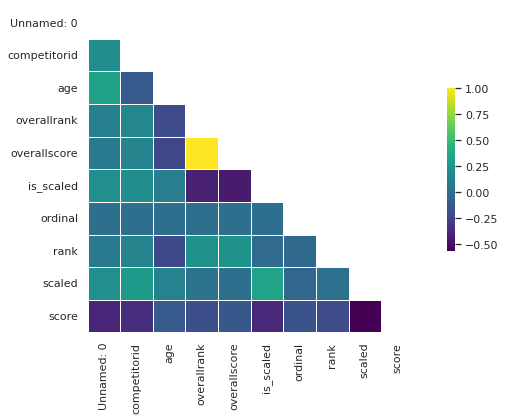

In [322]:
mascara = np.triu(np.ones_like(corr_19, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr_19,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral
            #annot=True
);

In [74]:
df_crossfit_open_20 = pd.read_csv("../data/clean_open20.csv")

In [ ]:
hist_data = [df_crossfit_games.bill_length_mm, df_crossfit_games.bill_depth_mm]
group_labels = ["bill_length_mm","bill_depth_mm"] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [ ]:
fig = px.line(crossfit, x="year", y="passengers", color="month")
fig.show()